In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 设置在jupyter中matplotlib的显示情况（表示不是嵌入显示）
# %matplotlib tk

In [3]:
# 解决中文显示问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

最终结果为:(0.25000, 0.00000)
迭代过程中X的取值，迭代次数:9
[4, 1.0, 0.3999999999999999, 0.27999999999999997, 0.256, 0.2512, 0.25024, 0.250048, 0.2500096, 0.25000192]


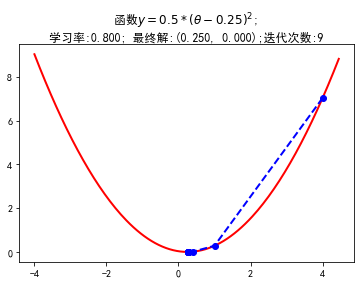

In [4]:
# 一维原始图像
def f1(x):
    return 0.5 * (x - 0.25) ** 2
# 导函数
def h1(x):
    return 0.5 * 2 * (x - 0.25)

# 使用梯度下降法求解
GD_X = []
GD_Y = []
x = 4
alpha = 0.8
f_change = f1(x)
f_current = f_change
GD_X.append(x)
GD_Y.append(f_current)
iter_num = 0
while f_change > 1e-10 and iter_num < 10:
    iter_num += 1
    x = x - alpha * h1(x)
    tmp = f1(x)
    f_change = np.abs(f_current - tmp)
    f_current  = tmp
    GD_X.append(x)
    GD_Y.append(f_current)
print(u"最终结果为:(%.5f, %.5f)" % (x, f_current))
print(u"迭代过程中X的取值，迭代次数:%d" % iter_num)
print(GD_X)


# 构建数据
X = np.arange(-4, 4.5, 0.05)
Y = np.array(list(map(lambda t: f1(t), X)))

# 画图
plt.figure(facecolor='w')
plt.plot(X, Y, 'r-', linewidth=2)
plt.plot(GD_X, GD_Y, 'bo--', linewidth=2)
plt.title(u'函数$y=0.5 * (θ - 0.25)^2$; \n学习率:%.3f; 最终解:(%.3f, %.3f);迭代次数:%d' % (alpha, x, f_current, iter_num))
plt.show()


最终结果为:(0.00000, 0.00000, 0.00000)
迭代过程中X的取值，迭代次数:12
[4, 1.2000000000000002, 0.3600000000000001, 0.10800000000000004, 0.03240000000000001, 0.009720000000000006, 0.002916000000000002, 0.0008748000000000007, 0.0002624400000000003, 7.873200000000009e-05, 2.3619600000000034e-05, 7.0858800000000115e-06, 2.125764000000004e-06]


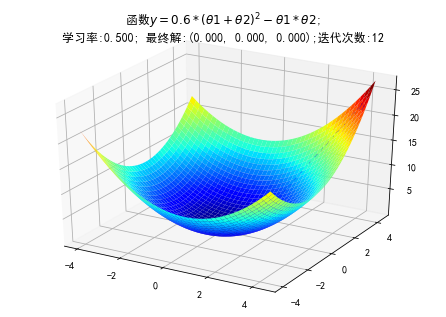

In [5]:
# 二维原始图像
def f2(x, y):
    return 0.6 * (x + y) ** 2 - x * y
# 导函数
def hx2(x, y):
    return 0.6 * 2 * (x + y) - y
def hy2(x, y):
    return 0.6 * 2 * (x + y) - x

# 使用梯度下降法求解
GD_X1 = []
GD_X2 = []
GD_Y = []

x1 = 4
x2 = 4
alpha = 0.5
f_change = f2(x1, x2)
f_current = f_change
GD_X1.append(x1)
GD_X2.append(x2)
GD_Y.append(f_current)

iter_num = 0
while f_change > 1e-10 and iter_num < 100:
    iter_num += 1
    prex1 = x1
    prex2 = x2
    x1 = x1 - alpha * hx2(prex1, prex2)
    x2 = x2 - alpha * hy2(prex1, prex2)
    
    tmp = f2(x1, x2)
    f_change = np.abs(f_current - tmp)
    
    f_current  = tmp
    GD_X1.append(x1)
    GD_X2.append(x2)
    GD_Y.append(f_current)
print(u"最终结果为:(%.5f, %.5f, %.5f)" % (x1, x2, f_current))
print(u"迭代过程中X的取值，迭代次数:%d" % iter_num)
print(GD_X1)


# 构建数据
X1 = np.arange(-4, 4.5, 0.2)
X2 = np.arange(-4, 4.5, 0.2)
X1, X2 = np.meshgrid(X1, X2)
Y = np.array(list(map(lambda t: f2(t[0], t[1]), zip(X1.flatten(), X2.flatten()))))
Y.shape = X1.shape


# 画图
fig = plt.figure(facecolor='w')
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=plt.cm.jet)
ax.plot(GD_X1, GD_X2, GD_Y, 'bo--')

ax.set_title(u'函数$y=0.6 * (θ1 + θ2)^2 - θ1 * θ2$;\n学习率:%.3f; 最终解:(%.3f, %.3f, %.3f);迭代次数:%d' % (alpha, x1, x2, f_current, iter_num))
plt.show()


最终结果为:(0.14411, 1.77726, 0.66090)
迭代过程中X的取值，迭代次数:20
[4, 3.44875, 2.974073125, 2.5650366334375, 2.2122840240807813, 1.907807009032696, 1.6447505126984427, 1.4172459115413019, 1.2202684228754865, 1.0495151438807482, 0.9013007490321259, 0.7724682876727775, 0.6603128941660266, 0.5625165400494098, 0.47709222866389206, 0.4023362645026025, 0.33678742770773373, 0.2791920536090157, 0.22847416210441832, 0.1837099055922843, 0.14410571011704013]


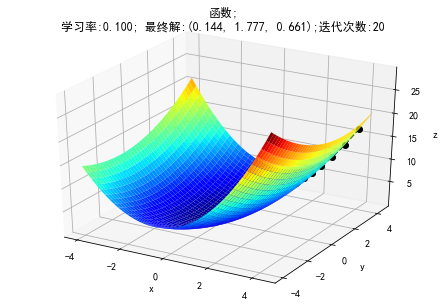

In [6]:
# 二维原始图像
def f2(x, y):
    return 0.15 * (x + 0.5) ** 2 + 0.25 * (y  - 0.25) ** 2 + 0.35 * (1.5 * x - 0.2 * y + 0.35 ) ** 2  
## 偏函数
def hx2(x, y):
    return 0.15 * 2 * (x + 0.5) + 0.25 * 2 * (1.5 * x - 0.2 * y + 0.35 ) * 1.5
def hy2(x, y):
    return 0.25 * 2 * (y  - 0.25) - 0.25 * 2 * (1.5 * x - 0.2 * y + 0.35 ) * 0.2

# 使用梯度下降法求解
GD_X1 = []
GD_X2 = []
GD_Y = []
x1 = 4
x2 = 4
alpha = 0.1
f_change = f2(x1, x2)
f_current = f_change
GD_X1.append(x1)
GD_X2.append(x2)
GD_Y.append(f_current)
iter_num = 0
while f_change > 1e-10 and iter_num < 20:
    iter_num += 1
    prex1 = x1
    prex2 = x2
    x1 = x1 - alpha * hx2(prex1, prex2)
    x2 = x2 - alpha * hy2(prex1, prex2)
    
    tmp = f2(x1, x2)
    f_change = np.abs(f_current - tmp)
    f_current  = tmp
    GD_X1.append(x1)
    GD_X2.append(x2)
    GD_Y.append(f_current)
print(u"最终结果为:(%.5f, %.5f, %.5f)" % (x1, x2, f_current))
print(u"迭代过程中X的取值，迭代次数:%d" % iter_num)
print(GD_X1)


# 构建数据
X1 = np.arange(-4, 4.5, 0.2)
X2 = np.arange(-4, 4.5, 0.2)
X1, X2 = np.meshgrid(X1, X2)
Y = np.array(list(map(lambda t: f2(t[0], t[1]), zip(X1.flatten(), X2.flatten()))))
Y.shape = X1.shape


# 画图
fig = plt.figure(facecolor='w')
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=plt.cm.jet)
ax.plot(GD_X1, GD_X2, GD_Y, 'ko--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(u'函数;\n学习率:%.3f; 最终解:(%.3f, %.3f, %.3f);迭代次数:%d' % (alpha, x1, x2, f_current, iter_num))
plt.show()